# <span style="color:mediumvioletred">Análisis de secuenciación de una sola célula (scRNAseq) en Hepatoblastoma (HB)</span>

El presente análisis de secuenciación de una sola célula, se basa en el estudio de Bruce Aronow et al., (January 25, 2023), *"Modeling Hepatoblastoma: Identification of Distinct Tumor Cell Populations and Key Genetic Mechanisms through Single Cell Sequencing (scRNA-seq)"*  obtenido a través del portal *Human Cell Atlas* (HCA) [https://data.humancellatlas.org/] donde se descargaron los archivos de matriz 10X con un subconjunto de muestra: 2 muestras de hígado sano (control) y 5 muestras de tumor de hepatoblastoma con el tipo de archivo *tar.gz* que contiene 14 archivos (2,63 GB).

Además, este análisis de secuenciación de ARN de una sola célula se basa en el tutorial de **scanpy** recuperado de: https://scanpy.readthedocs.io/en/stable/tutorials/basics/clustering.html#dimensionality-reduction.

--------
## <span style="color:palevioletred">1. Preprocessing and clustering</span> 

### **Preprocesamiento y agrupamiento**

1. **Importación de librerías**:
   ```python
   import scanpy as sc
   import anndata as ad
   import pooch
   ```
   Estas líneas importan las librerías principales de *scverse* para el análisis de datos de secuenciación de ARN a una sola célula (*scanpy* y *anndata*), y *pooch* para la gestión de descargas de datos.

In [1]:
# Core scverse libraries
import scanpy as sc
import anndata as ad

# Data retrieval
import pooch

------
2. **Configuración de figuras**:
   ```python
   sc.settings.set_figure_params(dpi=50, facecolor="white")
   ```
   Ajusta los parámetros para las figuras generadas por *scanpy*, definiendo la resolución (DPI) y el color de fondo.

In [2]:
sc.settings.set_figure_params(dpi=50, facecolor="white")

In [3]:
import os

data_directory = "/home/mcgonzalez/Servicio_Social/Data/HB_filtered"
print(os.listdir(data_directory))  # Muestra los archivos en el directorio

['HB30_PDX_filtered_feature_bc_matrix', 'HB17_background_filtered_feature_bc_matrix', 'HB17_tumor_filtered_feature_bc_matrix', '.ipynb_checkpoints', 'HB30_tumor_filtered_feature_bc_matrix', 'HB53_tumor_filtered_feature_bc_matrix', 'HB17_PDX_filtered_feature_bc_matrix', 'HB53_background_filtered_feature_bc_matrix']


In [4]:
import shutil

checkpoint_directory = os.path.join(data_directory, '.ipynb_checkpoints')
if os.path.exists(checkpoint_directory):
    shutil.rmtree(checkpoint_directory)
    print(f"{checkpoint_directory} eliminado.")
else:
    print(f"{checkpoint_directory} no existe.")

/home/mcgonzalez/Servicio_Social/Data/HB_filtered/.ipynb_checkpoints eliminado.


In [5]:
data_directory = "/home/mcgonzalez/Servicio_Social/Data/HB_filtered"
print(os.listdir(data_directory))  # Muestra los archivos en el directorio

['HB30_PDX_filtered_feature_bc_matrix', 'HB17_background_filtered_feature_bc_matrix', 'HB17_tumor_filtered_feature_bc_matrix', 'HB30_tumor_filtered_feature_bc_matrix', 'HB53_tumor_filtered_feature_bc_matrix', 'HB17_PDX_filtered_feature_bc_matrix', 'HB53_background_filtered_feature_bc_matrix']


-----
Leyendo la matriz de conteo en un objeto AnnData , que contiene muchos espacios para anotaciones y diferentes representaciones de los datos.

3. **Concatenación de datos**:
   ```python
   adata = ad.concat(adatas, label="sample")
   adata.obs_names_make_unique()
   print(adata.obs["sample"].value_counts())
   adata
   ```
   Se concatenan las muestras en un único objeto `AnnData` con la etiqueta de "sample". Luego, se imprimen las cantidades de cada muestra para verificar la correcta unión de datos.

In [6]:
# Importamos las bibliotecas
import os
import scanpy as sc

# Directorio de datos
data_directory = "/home/mcgonzalez/Servicio_Social/Data/HB_filtered"

# Definimos los nombres de las muestras y sus respectivos directorios
samples = {
    "HB17_background": "HB17_background_filtered_feature_bc_matrix",
    "HB17_PDX": "HB17_PDX_filtered_feature_bc_matrix",
    "HB17_tumor": "HB17_tumor_filtered_feature_bc_matrix",
    "HB30_PDX": "HB30_PDX_filtered_feature_bc_matrix",
    "HB30_tumor": "HB30_tumor_filtered_feature_bc_matrix",
    "HB53_background": "HB53_background_filtered_feature_bc_matrix",
    "HB53_tumor": "HB53_tumor_filtered_feature_bc_matrix"
    
}

adatas = {}

for sample_id, folder_name in samples.items():
    # Construir la ruta a los archivos
    folder_path = os.path.join(data_directory, folder_name)
    matrix_file = os.path.join(folder_path, "matrix.mtx.gz")
    barcodes_file = os.path.join(folder_path, "barcodes.tsv.gz")
    features_file = os.path.join(folder_path, "features.tsv.gz")

    # Cargar los datos
    try:
        sample_adata = sc.read_10x_mtx(
            folder_path,  # Ruta de la carpeta
            var_names="gene_symbols",  # O "gene_ids" según tu archivo features.tsv
            cache=True
        )
        adatas[sample_id] = sample_adata
    except Exception as e:
        print(f"No se encontraron datos para {sample_id}: {e}")

# Concatenar todos los datos en un solo objeto AnnData
if adatas:
    adata = sc.concat(adatas.values(), label="sample")
    adata.obs_names_make_unique()  # Asegúrate de que los nombres de las observaciones son únicos

    # Imprimir el conteo de muestras
    print(adata.obs["sample"].value_counts())
else:
    print("No se encontraron datos para cargar.")

4    19042
6    12832
0    11197
3    10303
5     8540
1     8027
2     7995
Name: sample, dtype: int64


/home/mcgonzalez/miniconda3/envs/SS/lib/python3.10/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [7]:
adatas

{'HB17_background': AnnData object with n_obs × n_vars = 11197 × 33538
     var: 'gene_ids', 'feature_types',
 'HB17_PDX': AnnData object with n_obs × n_vars = 8027 × 33538
     var: 'gene_ids', 'feature_types',
 'HB17_tumor': AnnData object with n_obs × n_vars = 7995 × 33538
     var: 'gene_ids', 'feature_types',
 'HB30_PDX': AnnData object with n_obs × n_vars = 10303 × 33538
     var: 'gene_ids', 'feature_types',
 'HB30_tumor': AnnData object with n_obs × n_vars = 19042 × 33538
     var: 'gene_ids', 'feature_types',
 'HB53_background': AnnData object with n_obs × n_vars = 8540 × 33538
     var: 'gene_ids', 'feature_types',
 'HB53_tumor': AnnData object with n_obs × n_vars = 12832 × 33538
     var: 'gene_ids', 'feature_types'}

Los datos contienen aproximadamente 1000 células por muestra y 33538 genes medidos.

-------
## <span style="color:palevioletred">2. Quality Control</span>
La función scanpy `calculate_qc_metrics()` calcula métricas de control de calidad (QC) comunes, que se basan principalmente en `calculateQCMetricsscater` [ McCarthy et al. , 2017 ]. Se puede pasar una población de genes específica a `calculate_qc_metrics()` para calcular proporciones de recuentos para estas poblaciones. Los genes mitocondriales, ribosomales y de hemoglobina se definen mediante prefijos distintos, como se indica a continuación.

---------
### 2.0 Configuración del entrono y datos:

In [8]:
import numpy as np
import scanpy as sc
import seaborn as sns
from scipy.stats import median_abs_deviation

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

In [9]:
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 77936 × 33538
    obs: 'sample'

-----
1. **Identificación de genes específicos**:
   ```python
   adata.var["mt"] = adata.var_names.str.startswith("MT-")
   adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
   adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")
   ```
   Se añaden columnas a `adata.var` para identificar genes mitocondriales ("MT-"), ribosomales ("RPS" y "RPL"), y de hemoglobina ("HB").

In [10]:
# mitochondrial genes, "MT-" for human, "Mt-" for mouse
adata.var["mt"] = adata.var_names.str.startswith("MT-")
# ribosomal genes
adata.var["ribo"] = adata.var_names.str.startswith(("RPS", "RPL"))
# hemoglobin genes
adata.var["hb"] = adata.var_names.str.contains("^HB[^(P)]")

-----
2. **Cálculo de métricas de calidad**:
   ```python
   sc.pp.calculate_qc_metrics(
       adata, qc_vars=["mt", "ribo", "hb"], inplace=True, log1p=True
   )
   ```
   Calcula métricas de calidad, como el porcentaje de genes mitocondriales o ribosomales, y las guarda en el objeto `adata`.

In [11]:
# cálculo de las métricas de control de claidad (QC) con scanpy:
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo", "hb"], inplace=True, percent_top=[20], log1p=True
)
adata

AnnData object with n_obs × n_vars = 77936 × 33538
    obs: 'sample', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

-----------
Gráfica de las tres covariables del control de calidad (QC) y `n_genes_by_counts` por muestra.

Esto con la finalidad de evaluar la calidad con la que se capturaron las respectivas células `total_counts`, `pct_counts_mt`

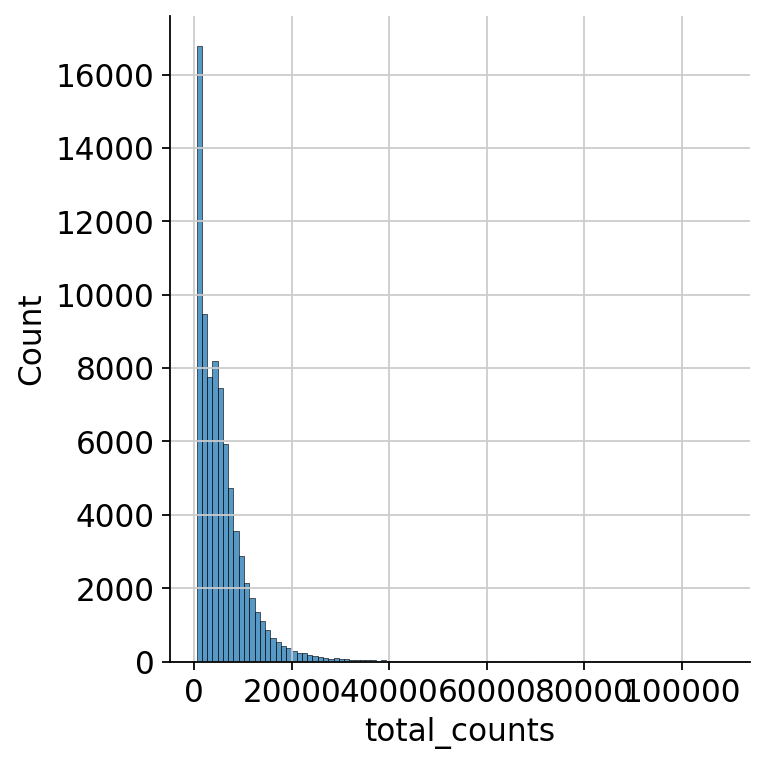

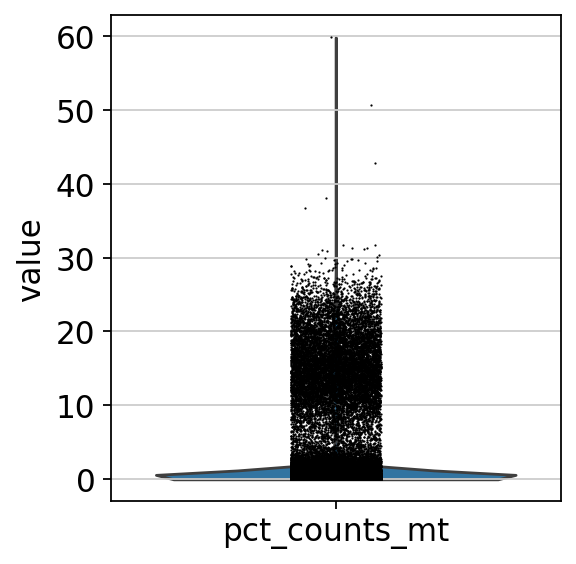

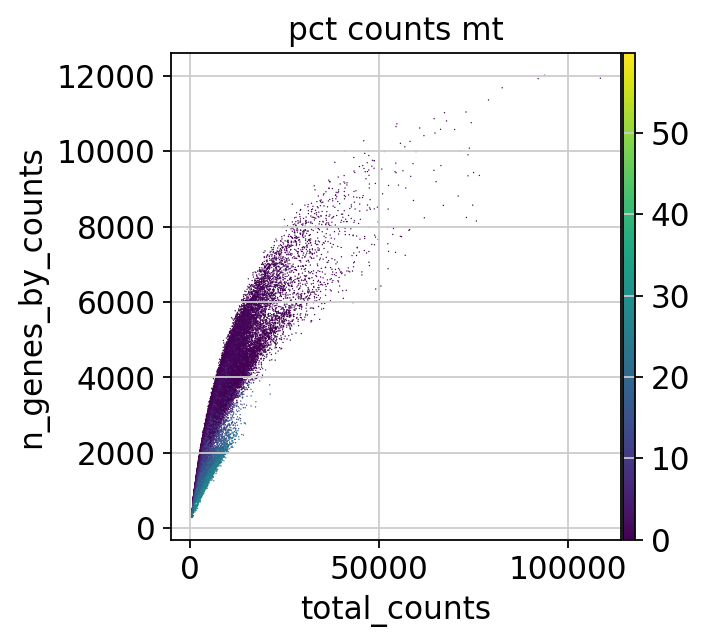

In [12]:
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(adata, "pct_counts_mt")
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

Estos gráficos nos muestran que varias células tienen un porcentaje relativamente alto de recuentos mitocondriales (comunmente asociados a la degradación celular). No obstante, dado a que el número de recuentos por célula es suficientemente alto así como el porcentaje de lectruras mitocondriales que es inferior al 10% para la mayoría de las células.

---------
Definición de umbrales manuales para filtrar células MAD (derivaciones absolutas medianas).

$$ MAD = \text{mediana} \left(|X_{i}-\text{mediana}(X)|\right) $$

donde $X_{i}$ es la métrica de control de calidad respectiva de una observación y describe estadísticamente la variablilidad de la métrica.

a) definimos la función `metric` (una columna en `.obs` y el número de MAD `nmad`

In [13]:
def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
        np.median(M) + nmads * median_abs_deviation(M) < M
    )
    return outlier

Aplicamos la función a las colvariables: `log1p_total_counts`, `log1p_n_genes_by_counts` y `pct_counts_in_top_20_genes` estableciendo un umbral de 5 MAD.

Aquí `pct_counts_Mt` se filtra con 3 MAD. Además, se eliminan aquellas células con un porcentaje de recuento mitocondrial mayor al 8%

In [14]:
adata.obs["outlier"] = (
    is_outlier(adata, "log1p_total_counts", 5)
    | is_outlier(adata, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata, "pct_counts_in_top_20_genes", 5)
)
adata.obs.outlier.value_counts()

False    71070
True      6866
Name: outlier, dtype: int64

In [15]:
adata.obs["mt_outlier"] = is_outlier(adata, "pct_counts_mt", 3) | (
    adata.obs["pct_counts_mt"] > 8
)
adata.obs.mt_outlier.value_counts()

False    58707
True     19229
Name: mt_outlier, dtype: int64

In [16]:
# Definimos el objeto AnnData en función de las columnas:

print(f"Total number of cells: {adata.n_obs}")
adata = adata[(~adata.obs.outlier) & (~adata.obs.mt_outlier)].copy()

print(f"Number of cells after filtering of low quality cells: {adata.n_obs}")

Total number of cells: 77936
Number of cells after filtering of low quality cells: 58689


------
3. **Visualización de métricas**:
   ```python
   sc.pl.violin(
       adata,
       ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
       jitter=0.4,
       multi_panel=True,
   )
   sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")
   ```
   Se crean gráficos de violín y dispersión para visualizar algunas de las métricas de control de calidad calculadas: el número de genes expresados en la matriz de recuento, el recuento total por célula y el porcentaje de recuentos en genes mitocondriales.

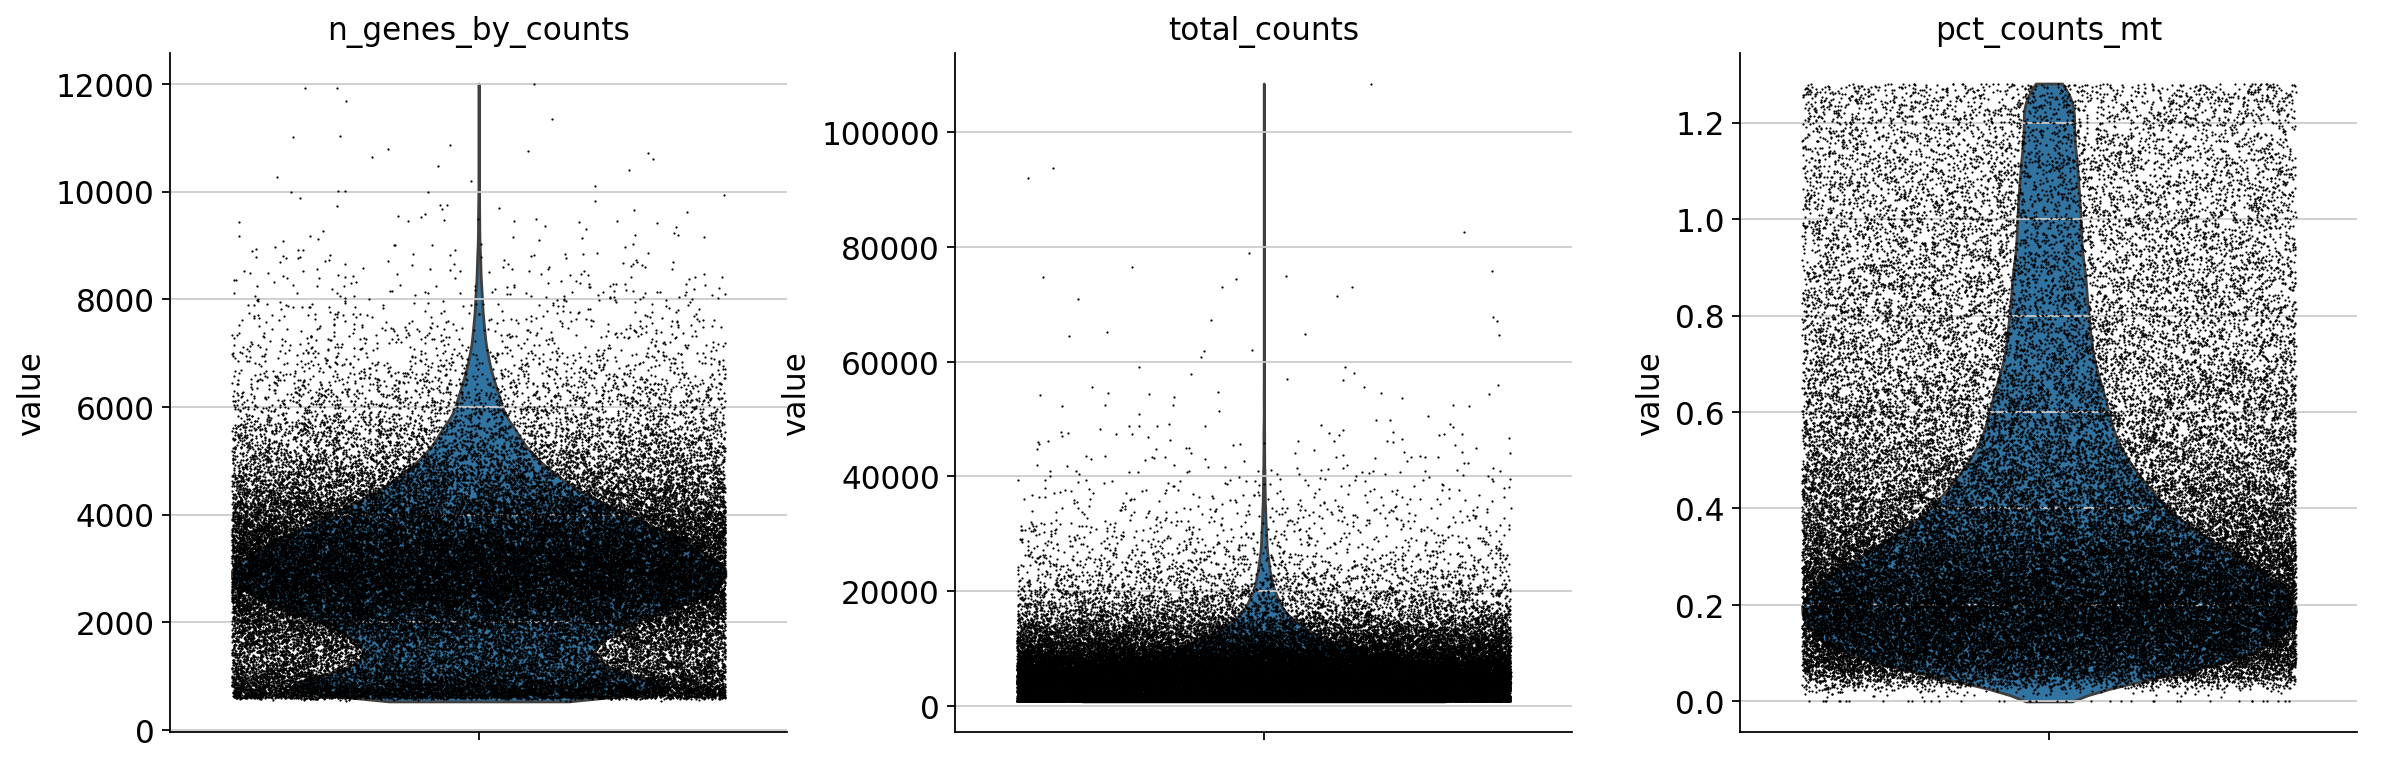

In [17]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

Además, es útil considerar las métricas de control de calidad de forma conjunta inspeccionando un diagrama de dispersión coloreado por `pct_counts_mt`.

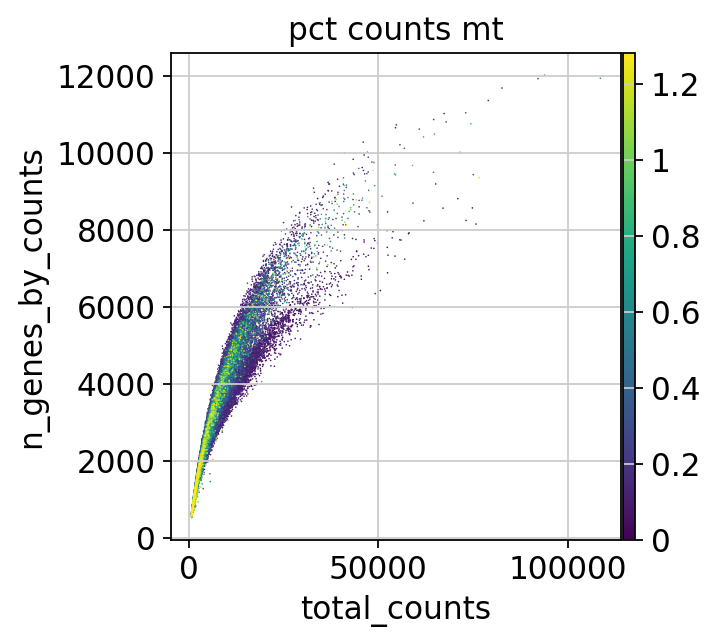

In [18]:
sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

------
4. **Filtrado de células y genes**:
A partir de los gráficos de métricas de control de calidad, es posible eliminar células con una cantidad excesiva de genes mitocondriales expresados o con un número total de recuentos muy alto, estableciendo umbrales de manera manual o automática. No obstante, dado que algunas métricas aparentemente deficientes podrían reflejar diferencias biológicas reales, es recomendable comenzar con un filtrado laxo y ajustarlo posteriormente. Por ello, solo eliminamos células con menos de 100 genes expresados y genes presentes en menos de 3 células.

Asimismo, para conjuntos de datos con múltiples lotes, es fundamental realizar el control de calidad por separado en cada muestra, ya que los umbrales pueden variar significativamente entre lotes.

In [19]:
sc.pp.filter_cells(adata, min_genes=100)
sc.pp.filter_genes(adata, min_cells=3)

-----
## <span style="color:palevioletred">3. Doublet detection</span>
Como siguiente paso, ejecutamos un algoritmo para la detección de dobletes. La identificación de dobletes es fundamental, ya que pueden generar clasificaciones incorrectas o distorsionar los resultados en los análisis posteriores. Scanpy incluye el método Scrublet para la detección de dobletes [Wolock et al., 2019]. Scrublet predice dobletes celulares utilizando un clasificador de vecinos más cercanos que compara transcriptomas observados con dobletes simulados. La función `scanpy.pp.scrublet()` añade las columnas `doublet_score` y `predicted_doublet` al objeto `.obs`. De este modo, es posible filtrar directamente por `predicted_doublet` o utilizar `doublet_score` para eliminar grupos con puntuaciones altas de dobletes durante la fase de agrupamiento.

1. **Detección usando Scrublet**:
   ```python
   sc.pp.scrublet(adata, batch_key="sample")
   ```
   Usa el método *Scrublet* para detectar posibles células dobles (dobletes), agrupando por la etiqueta de "sample".

In [20]:
import skimage
print(skimage.__version__)

0.24.0


Podemos eliminar los dobletes filtrando directamente las células identificadas como tales o esperar hasta completar una primera ronda de agrupamiento para luego filtrar los grupos que presenten puntuaciones altas de dobletes. Esta segunda estrategia permite un enfoque más refinado, ya que se pueden identificar y descartar grupos completos que hayan sido afectados por la presencia de dobletes.

In [24]:
sc.pp.scrublet(adata, batch_key="sample", n_prin_comps=8)

In [ ]:
# sc.pp.scrublet(adata, batch_key="sample", n_prin_comps=9, svd_solver="randomized")

-------
## <span style="color:palevioletred">4. Normalization</span>
El siguiente paso en el preprocesamiento es la normalización. Un método común consiste en el escalado por profundidad de conteo, seguido de una transformación logarítmica más uno (log1p). Este escalado ajusta los datos a un "factor de tamaño" específico, como la profundidad de conteo mediana del conjunto de datos, diez mil (CP10k) o un millón (CPM, conteos por millón). El factor de tamaño utilizado para el escalado se puede definir mediante el parámetro `target_sum` en `pp.normalize_total`. En este caso, estamos aplicando la normalización utilizando la profundidad de conteo mediana junto con la transformación log1p, también conocida como log1PF.

1. **Guardado de datos originales**:
   ```python
   adata.layers["counts"] = adata.X.copy()
   ```
   Guarda una copia de los datos originales (sin normalizar) en `adata.layers["counts"]`.

In [25]:
# Saving count data
adata.layers["counts"] = adata.X.copy()

-----
2. **Normalización y transformación logarítmica**:
   ```python
   sc.pp.normalize_total(adata)
   sc.pp.log1p(adata)
   ```
   Normaliza los datos a un recuento total por célula y luego aplica una transformación logarítmica (`log1p`).

In [26]:
# Normalizing to median total counts
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

-------
1. **Método 1: Logaritmo desplazado**

Éste método de normalización se basa en el método delta que aplica una función no lineal $f(y)$  a los recuentos brutos $y$ y su principal objetivo es hacer que las variaciones en nuestro conjunto de datos sean lo más parecidos poribles. Esto se define como:

$$f(y)=log\left(\frac{y}{s}+y_{0}\right)$$

donde $y$ representa los conteos crudos, $s$ es el factor de tamaño; determina para cada célula la cuenta de las variaciones en los efectos del muetsreo así como los diferentes tamaños de la célula y $y_{0}$ describe un pseudoconteo. El factor de tamaño de una ceúlula se calcula de la siguiente manera:

$$s_{c}=\frac{\sum_{g}y_{gc}}{L}$$

In [27]:
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

Graficamos cómo cambia la distribución de nuestros conteos después de que aplicamos el logaritmo desplazado y lo comparamos con la gráfica del conteo total de nuestro conjunto de datos sin procesar pero que sí está filtrado.

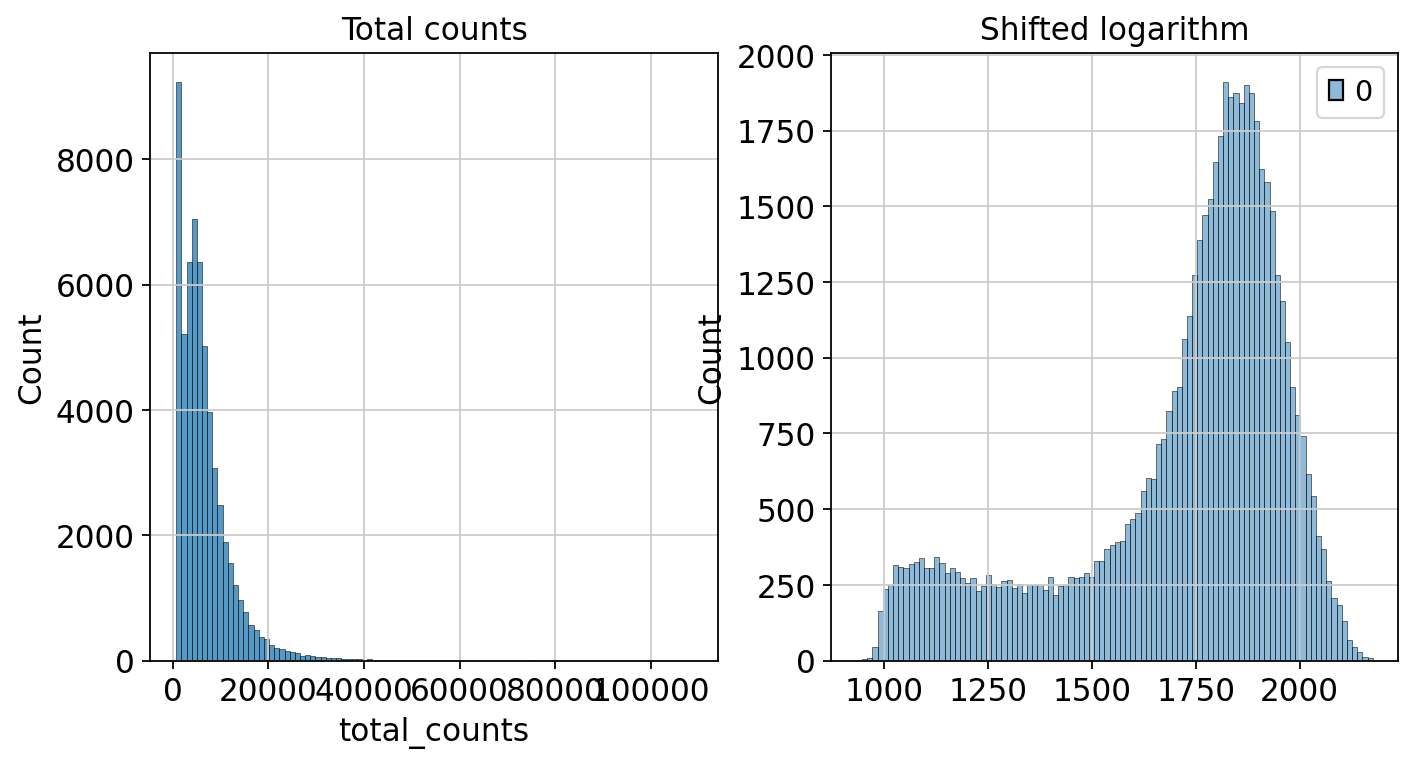

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

-----------
2. **Método 2: Residuos analíticos de Pearson:**

Éste método utiliza residuos de Pearson de la "regresión binomial negativa regularizada" que se encarga de calcular un modelo de ruido técnico de los datos. Lo que obtenemos de este método son los valores normalizados que pueden ser, para una célula y un gen:

- Positivos: indican que tenemos más recuentos
- Negativos: indican que tenemos menos recuentos de los esperado en comparación con la expresión promedio del gen y de la profundidad de la secuenciación celular.

En scanpy lo calculamos a partir de la matriz de recuento sin procesar.

In [29]:
import scanpy as sc
from scipy.sparse import csr_matrix

# Normalización de residuos de Pearson
analytic_pearson = sc.experimental.pp.normalize_pearson_residuals(adata, inplace=False)

# Guardar en la capa de adata
adata.layers["analytic_pearson_residuals"] = csr_matrix(analytic_pearson["X"])

/home/mcgonzalez/miniconda3/envs/SS/lib/python3.10/site-packages/scanpy/experimental/pp/_normalization.py:54: UserWarning: `normalize_pearson_residuals()` expects raw count data, but non-integers were found.
  warn(


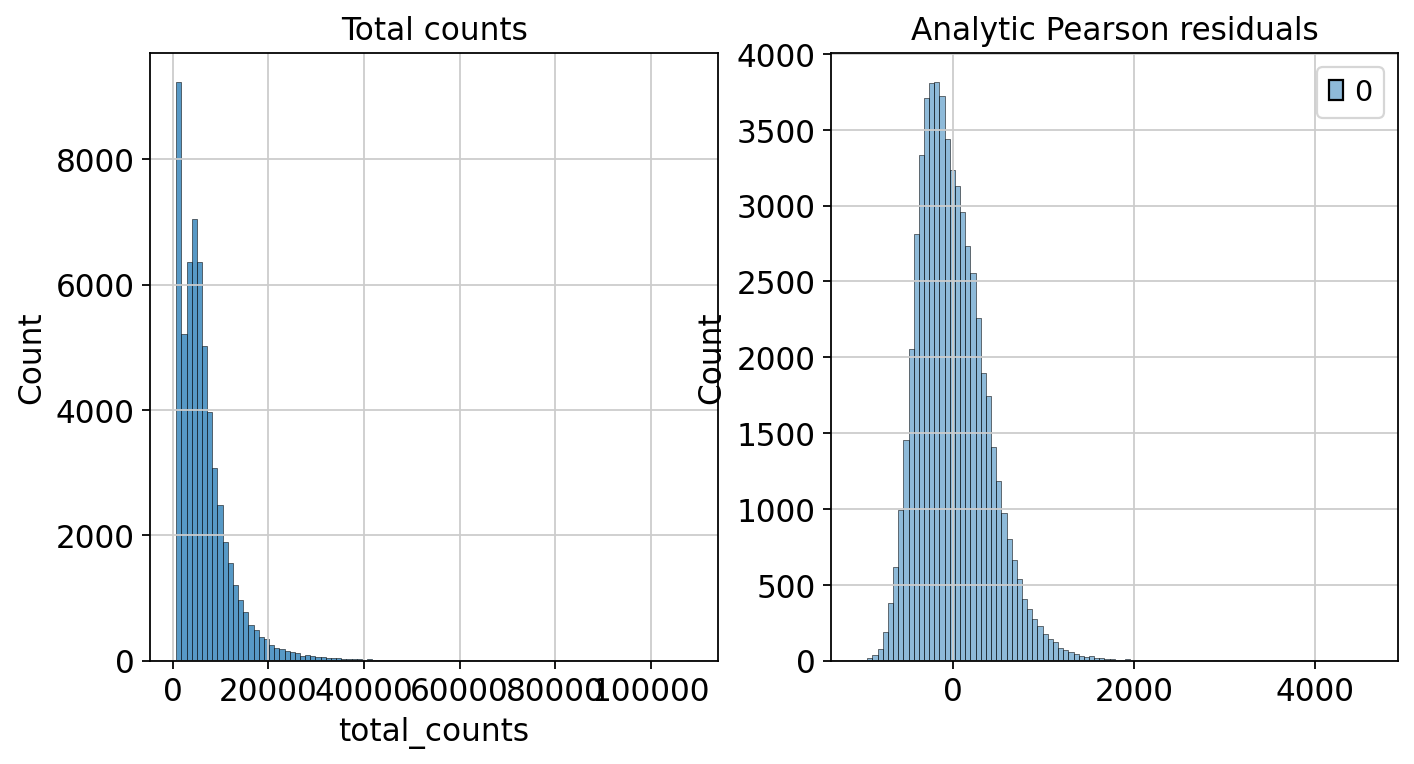

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(
    adata.layers["analytic_pearson_residuals"].sum(1), bins=100, kde=False, ax=axes[1]
)
axes[1].set_title("Analytic Pearson residuals")
plt.show()

-----
## <span style="color:palevioletred">5. Feature selection</span>
Como siguiente paso, buscamos reducir la dimensionalidad del conjunto de datos incluyendo solo los genes más informativos, en un proceso conocido como selección de características. La función `scanpy.pp.highly_variable_genes` identifica y anota los genes altamente variables, replicando las implementaciones de Seurat, Cell Ranger y Seurat v3 según el enfoque seleccionado mediante el parámetro `flavor`. Esta selección de genes permite enfocar el análisis en aquellos que aportan mayor variabilidad y relevancia biológica.

1. **Identificación de genes altamente variables**:
   ```python
   sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")
   sc.pl.highly_variable_genes(adata)
   ```
   Detecta los 2000 genes más variables y los visualiza.

In [31]:
import numpy as np

# Convertir la matriz dispersa a densa para verificar NaN y valores infinitos
dense_data = adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X

# Verificar si hay valores NaN en los datos
nan_mask = np.isnan(dense_data).any()
inf_mask = np.isinf(dense_data).any()

print(f"Hay valores NaN en adata.X: {nan_mask}")
print(f"Hay valores infinitos en adata.X: {inf_mask}")

Hay valores NaN en adata.X: False
Hay valores infinitos en adata.X: False


In [32]:
# Normalización y logaritmización
sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)

# Identificación de genes altamente variables
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")

# Inspeccionar resultados
print(adata.var[adata.var['highly_variable']].head(10))  # Muestra los genes altamente variables

             mt   ribo     hb  n_cells_by_counts  mean_counts  \
ISG15     False  False  False               4074     0.058946   
TNFRSF18  False  False  False                290     0.004042   
TNFRSF4   False  False  False                421     0.006082   
AURKAIP1  False  False  False              13287     0.208877   
VWA1      False  False  False               7615     0.110989   
FNDC10    False  False  False                288     0.003772   
PLCH2     False  False  False                173     0.002258   
TPRG1L    False  False  False               5598     0.080656   
KCNAB2    False  False  False               5039     0.083620   
PARK7     False  False  False              22185     0.377515   

          log1p_mean_counts  pct_dropout_by_counts  total_counts  \
ISG15              0.057274              94.772634        4594.0   
TNFRSF18           0.004034              99.627900         315.0   
TNFRSF4            0.006063              99.459813         474.0   
AURKAIP1    

In [33]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key="sample")

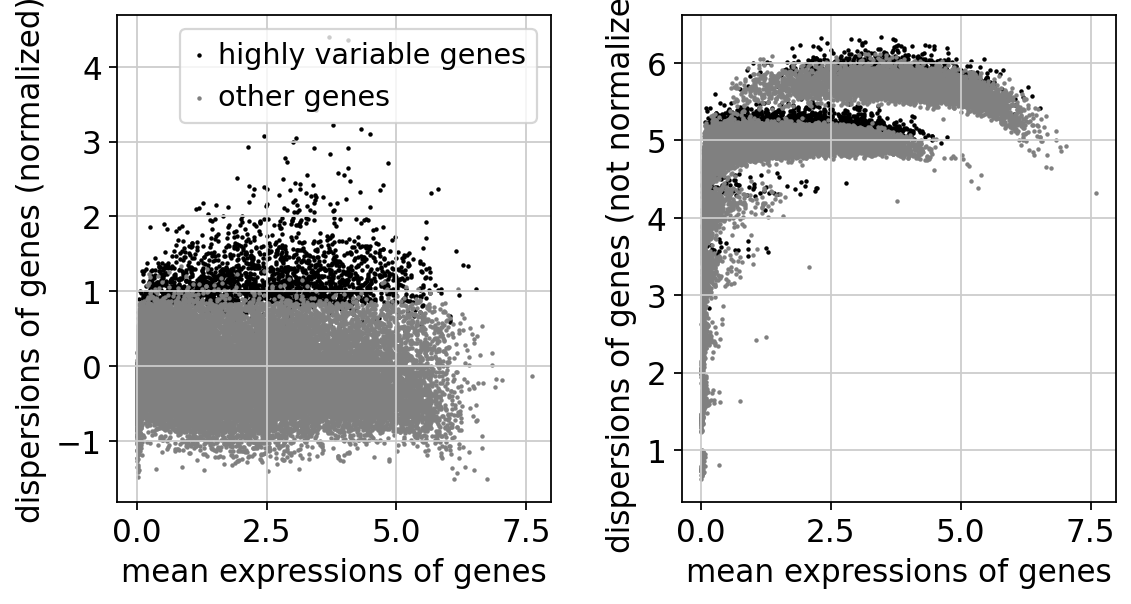

In [34]:
sc.pl.highly_variable_genes(adata)

---------
## <span style="color:palevioletred">6. Dimensionality Reduction</span>
Reducir la dimensionalidad de los datos mediante un análisis de componentes principales (PCA) permite identificar los principales ejes de variación y reducir el ruido presente en los datos. Esta técnica de reducción dimensional se enfoca en capturar la mayor variabilidad posible en un menor número de componentes, facilitando el análisis y la visualización al tiempo que preserva la estructura esencial de los datos.

1. **Análisis de componentes principales (PCA)**:
   ```python
   sc.tl.pca(adata)
   sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)
   sc.pl.pca(
       adata,
       color=["sample", "pct_counts_mt"],
       dimensions=[(0, 1), (2, 3)],
       ncols=2,
       size=2,
   )
   ```
   Realiza un análisis PCA y visualiza la proporción de varianza explicada. Luego, genera gráficos de los componentes principales.

In [35]:
sc.tl.pca(adata)

Inspeccionar la contribución de cada componente principal a la varianza total de los datos nos ayuda a determinar cuántos componentes considerar al calcular las relaciones de vecindad entre las células, como las empleadas en funciones de agrupamiento como `leiden()` o en técnicas de visualización como `tsne()`. En nuestra experiencia, sobreestimar el número de componentes principales no suele tener un impacto negativo significativo, por lo que se recomienda una selección generosa de componentes para capturar adecuadamente la estructura de los datos y evitar la pérdida de información relevante.

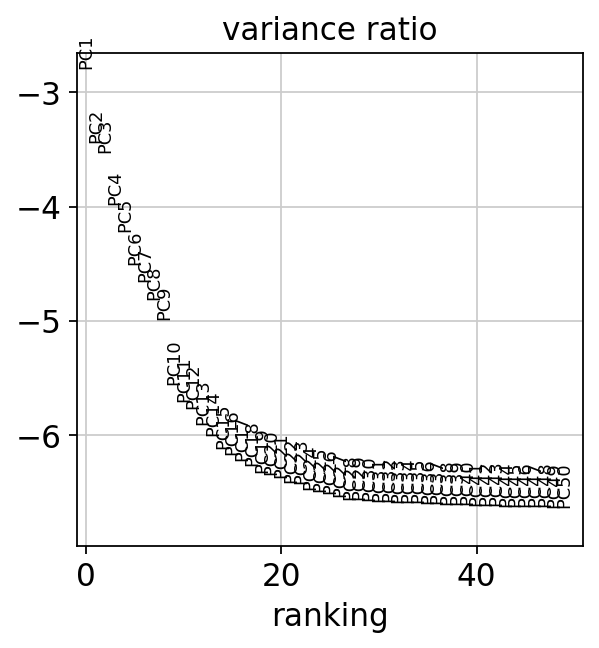

In [36]:
sc.pl.pca_variance_ratio(adata, n_pcs=50, log=True)

También se pueden graficar los componentes principales para identificar si existen características potencialmente no deseadas, como efectos de lote o métricas de control de calidad, que estén introduciendo una variación significativa en el conjunto de datos. Aunque en este caso no se ha encontrado nada demasiado preocupante, es una práctica recomendable explorar estas visualizaciones para detectar posibles fuentes de variabilidad no deseada y corregirlas si es necesario.

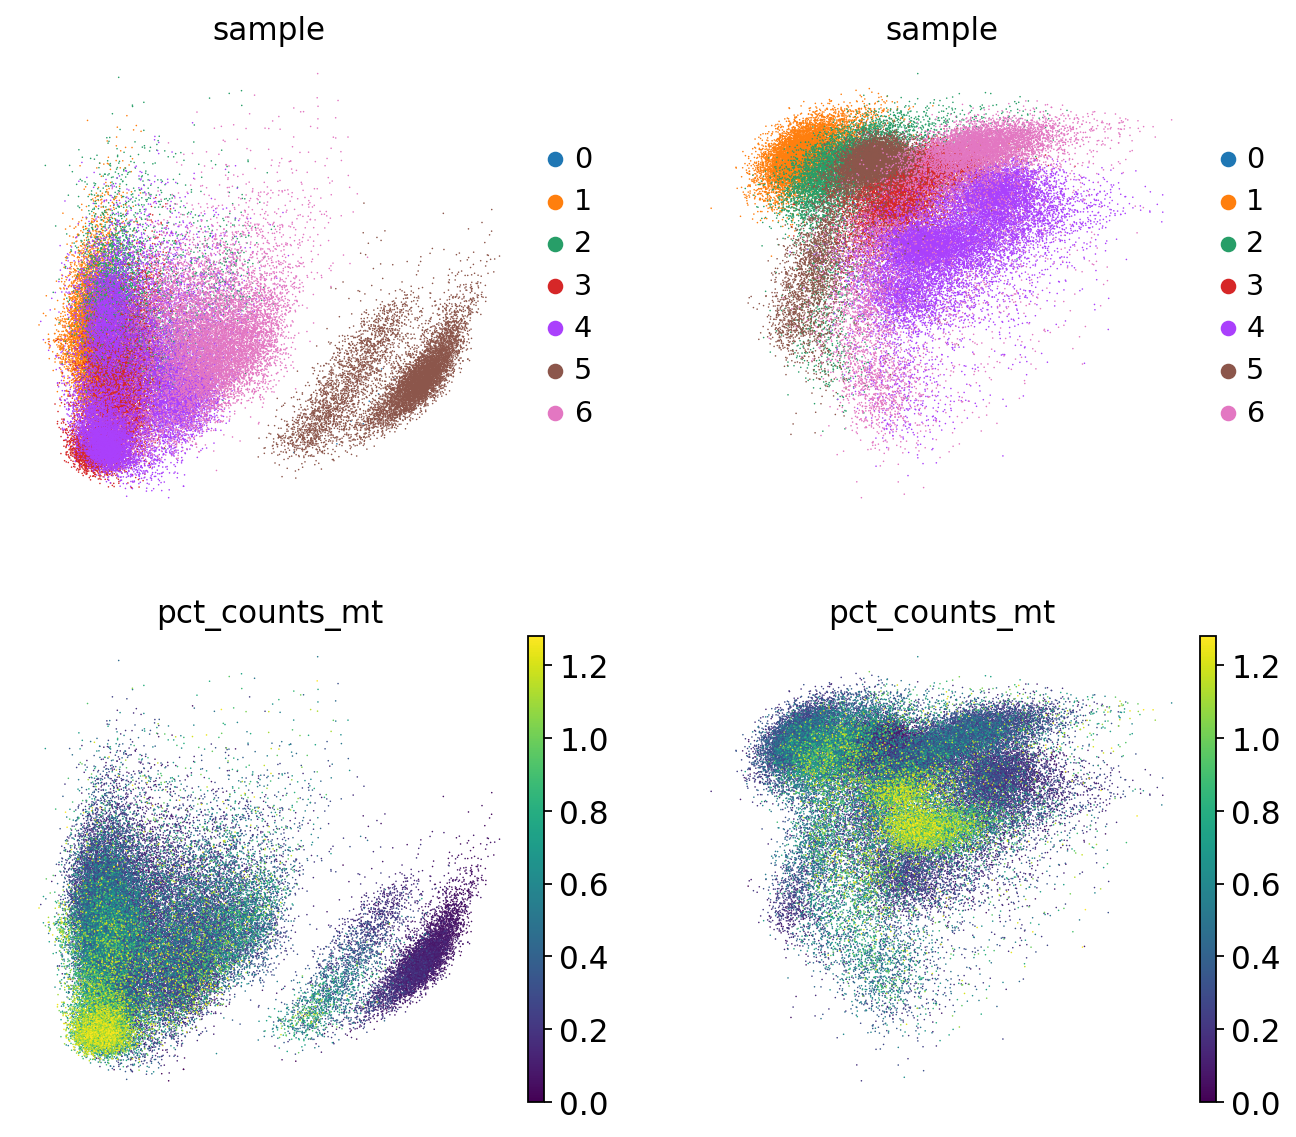

In [37]:
sc.pl.pca(
    adata,
    color=["sample", "sample", "pct_counts_mt", "pct_counts_mt"],
    dimensions=[(0, 1), (2, 3), (0, 1), (2, 3)],
    ncols=2,
    size=2,
)

-----
## <span style="color:palevioletred">7. Nearest neighbor graph constuction and visualization</span>
**Construcción y visualización de gráficos de vecinos más cercanos**: calculamos el gráfico de vecindad de celdas utilizando la representación PCA de la matriz de datos.

In [38]:
import scanpy as sc

sc.settings.verbosity = 0
sc.settings.set_figure_params(
    dpi=80,
    facecolor="white",
    frameon=False,
)

In [39]:
adata.X = adata.layers["log1p_norm"]

1. **Cálculo de vecinos y UMAP**:
   ```python
   sc.pp.neighbors(adata)
   sc.tl.umap(adata)
   sc.pl.umap(adata, color="sample", size=2)
   ```
   Calcula un gráfico de vecinos más cercanos y realiza una proyección UMAP, que se visualiza.
   
Este gráfico se puede luego incorporar en dos dimensiones para su visualización con UMAP

In [40]:
sc.pp.neighbors(adata)

/home/mcgonzalez/miniconda3/envs/SS/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ahora podemos visualizar el UMAP según el `sample`

In [41]:
sc.tl.umap(adata)

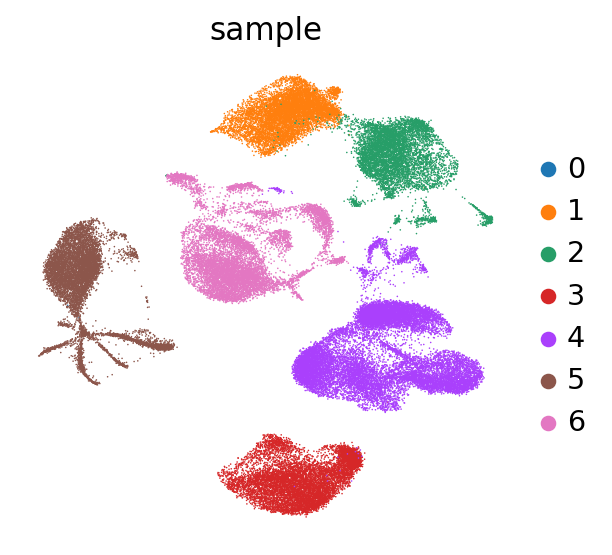

In [42]:
sc.pl.umap(
    adata,
    color="sample",
    # Setting a smaller point size to get prevent overlap
    size=2,
)

Aunque los datos utilizados en este tutorial incluyen dos muestras distintas, solo se observa un efecto de lote menor, por lo que podemos proceder con la agrupación y anotación de los datos.

Si al inspeccionar los efectos de lote en su UMAP se identifica una variabilidad significativa, podría ser útil integrar las muestras y aplicar correcciones o integraciones de lote. Para este propósito, se recomienda explorar herramientas como `scanorama` y `scvi-tools`, que ofrecen metodologías avanzadas para la integración de lotes y la corrección de sesgos entre muestras.

-----
## <span style="color:palevioletred">8. Clustering</span>
**Agrupamiento**: Al igual que en Seurat y muchos otros marcos de análisis, se recomienda el método de agrupamiento basado en grafos de Leiden, que se basa en la optimización de la modularidad para la detección de comunidades. Es importante tener en cuenta que el algoritmo de Leiden agrupa directamente el grafo de vecindad de las células, el cual ya fue calculado en la sección anterior. Este método es ampliamente utilizado debido a su eficacia para identificar grupos celulares en datos de alta dimensión.

1. **Clusterización usando Leiden**:
   ```python
   sc.tl.leiden(adata, flavor="igraph", n_iterations=2)
   sc.pl.umap(adata, color=["leiden"])
   ```
   Realiza la clusterización de las células usando el algoritmo Leiden con 2 iteraciones y visualiza los grupos en UMAP.

In [43]:
# Using the igraph implementation and a fixed number of iterations can be significantly faster, especially for larger datasets
sc.tl.leiden(adata, flavor="igraph", n_iterations=2)

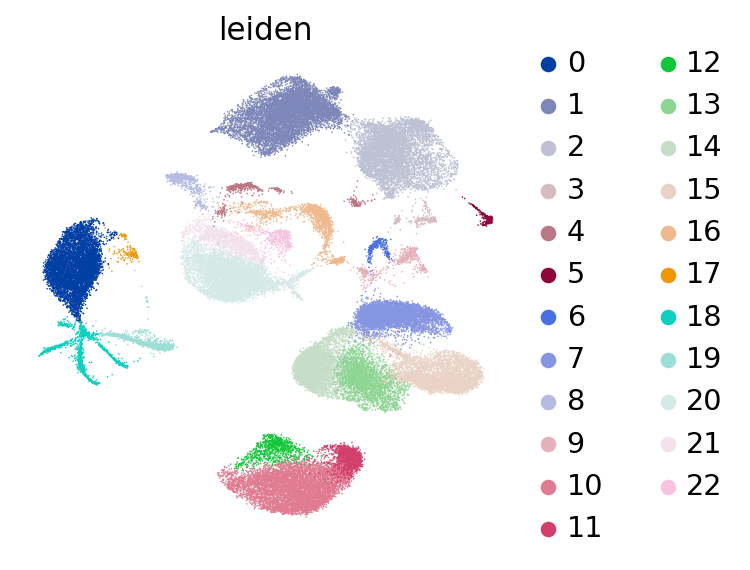

In [44]:
sc.pl.umap(adata, color=["leiden"])

-----
El algoritmo de **Leiden** utiliza en gráfico KNN en el espacio de expresión reducido en donde podemos calcular una representación de expreisón génica de menor dimensión mediante la función de scanpy `sc.pp.neighbors`. Esta función la usamos con 30 componentes principales dado a que estos datos logran capturar una gran parte de la varianza en nuestro conjunto de datos.

`sc.pp.neighbors`(adata [Matriz de datos anotada], n_pcs [determina una cantidad de PC])

In [45]:
sc.pp.neighbors(adata, n_pcs=30)
sc.tl.umap(adata)

Ahora sí, lo llamamos algoritmo de Leiden:

In [46]:
sc.tl.leiden(adata)

/tmp/ipykernel_3549190/3467744858.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


Aquí el parámetro de resolución predeterminado para scanpy es de 1.0.

In [47]:
sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

Finalmente, visualizamos los distintos resultados de agrupamiento que obtuvimos con el algoritmo Leiden para distintas resoluciones. En este caso, podemos observar que los parámetros con mayor resolución implican más comunidades; más agrupaciones definidas. Mientras que los parámetros con menor reolución implican menos comunidades.

Por lo tanto, el parámetro de resolución regula la densiada con la que el algoritmo de Leiden es capaz de agrupar los conjuntos de regiones de KNN.

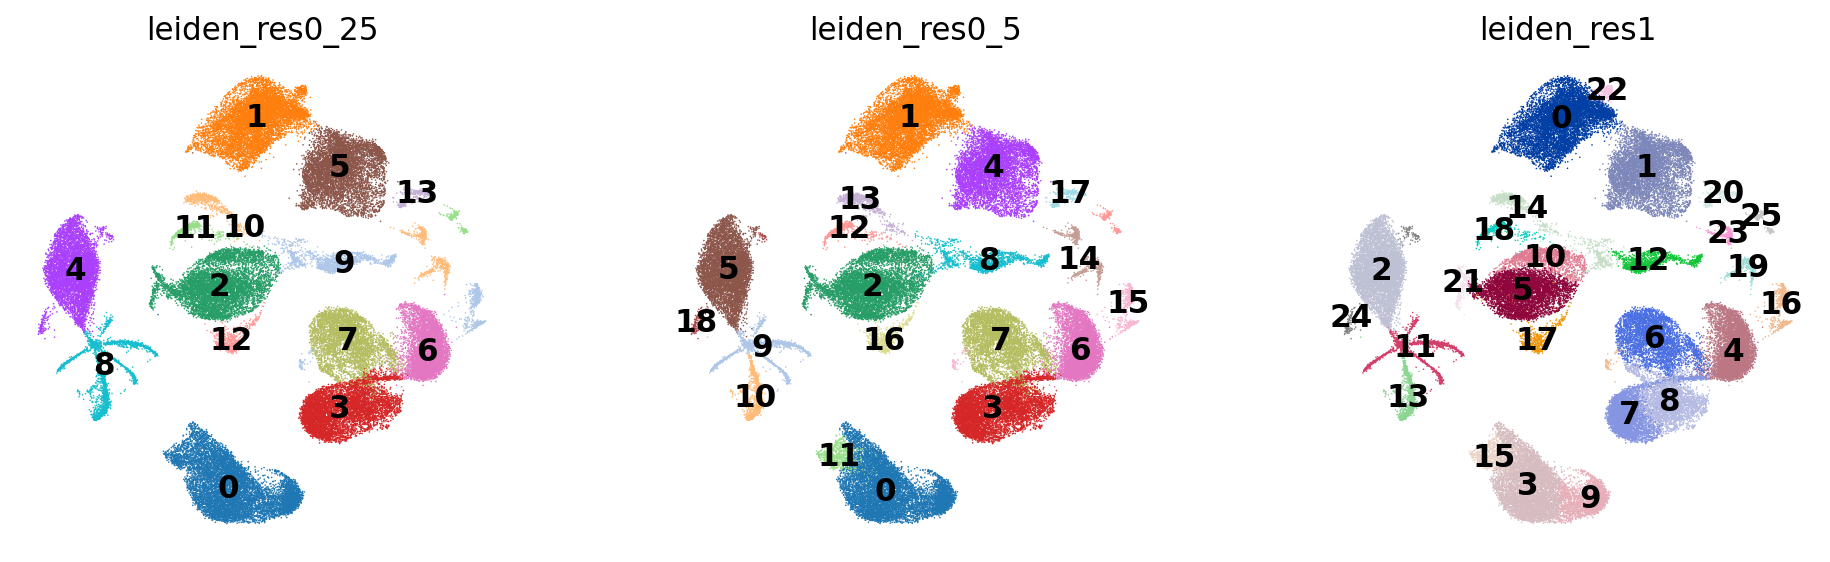

In [48]:
sc.pl.umap(
    adata,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"],
    legend_loc="on data",
)

Podemos observar que, para una resolución de 0.25, la agrupación es menor en comparación con las resoluciones de 0.5 y 0.1, por lo que el algoritmo detectó una menor cantidad de comunidades, así mismo, las comunidades son menos densas en comparación con la resolución de 1.0.

------
## <span style="color:palevioletred">9. Re-assess quality control and cell filtering</span>
**Reevaluación de control de calidad**: Como se indicó anteriormente, ahora reevaluaremos nuestra estrategia de filtrado visualizando diferentes métricas de control de calidad utilizando UMAP.

1. **Visualización de posibles dobletes y métricas de calidad**:
   ```python
   sc.pl.umap(
       adata,
       color=["leiden", "predicted_doublet", "doublet_score"],
       wspace=0.5,
       size=3,
   )
   sc.pl.umap(
       adata,
       color=["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
       wspace=0.5,
       ncols=2,
   )
   ```
   Visualiza la información de los clusters junto con las predicciones de dobletes y otras métricas de calidad.

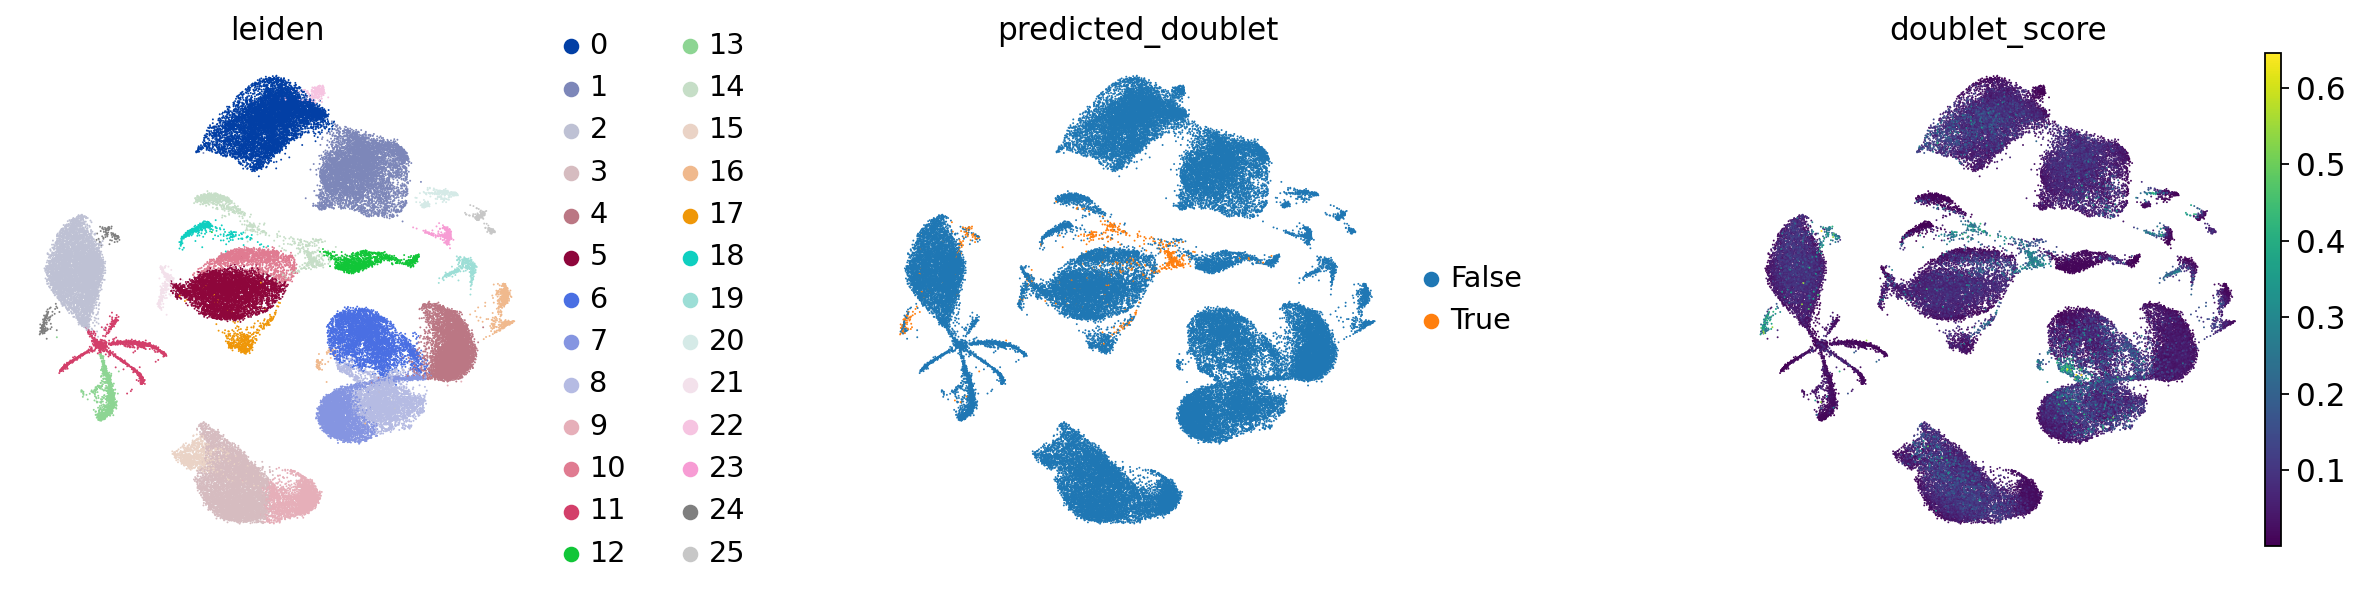

In [49]:
sc.pl.umap(
    adata,
    color=["leiden", "predicted_doublet", "doublet_score"],
    # increase horizontal space between panels
    wspace=0.5,
    size=3,
)

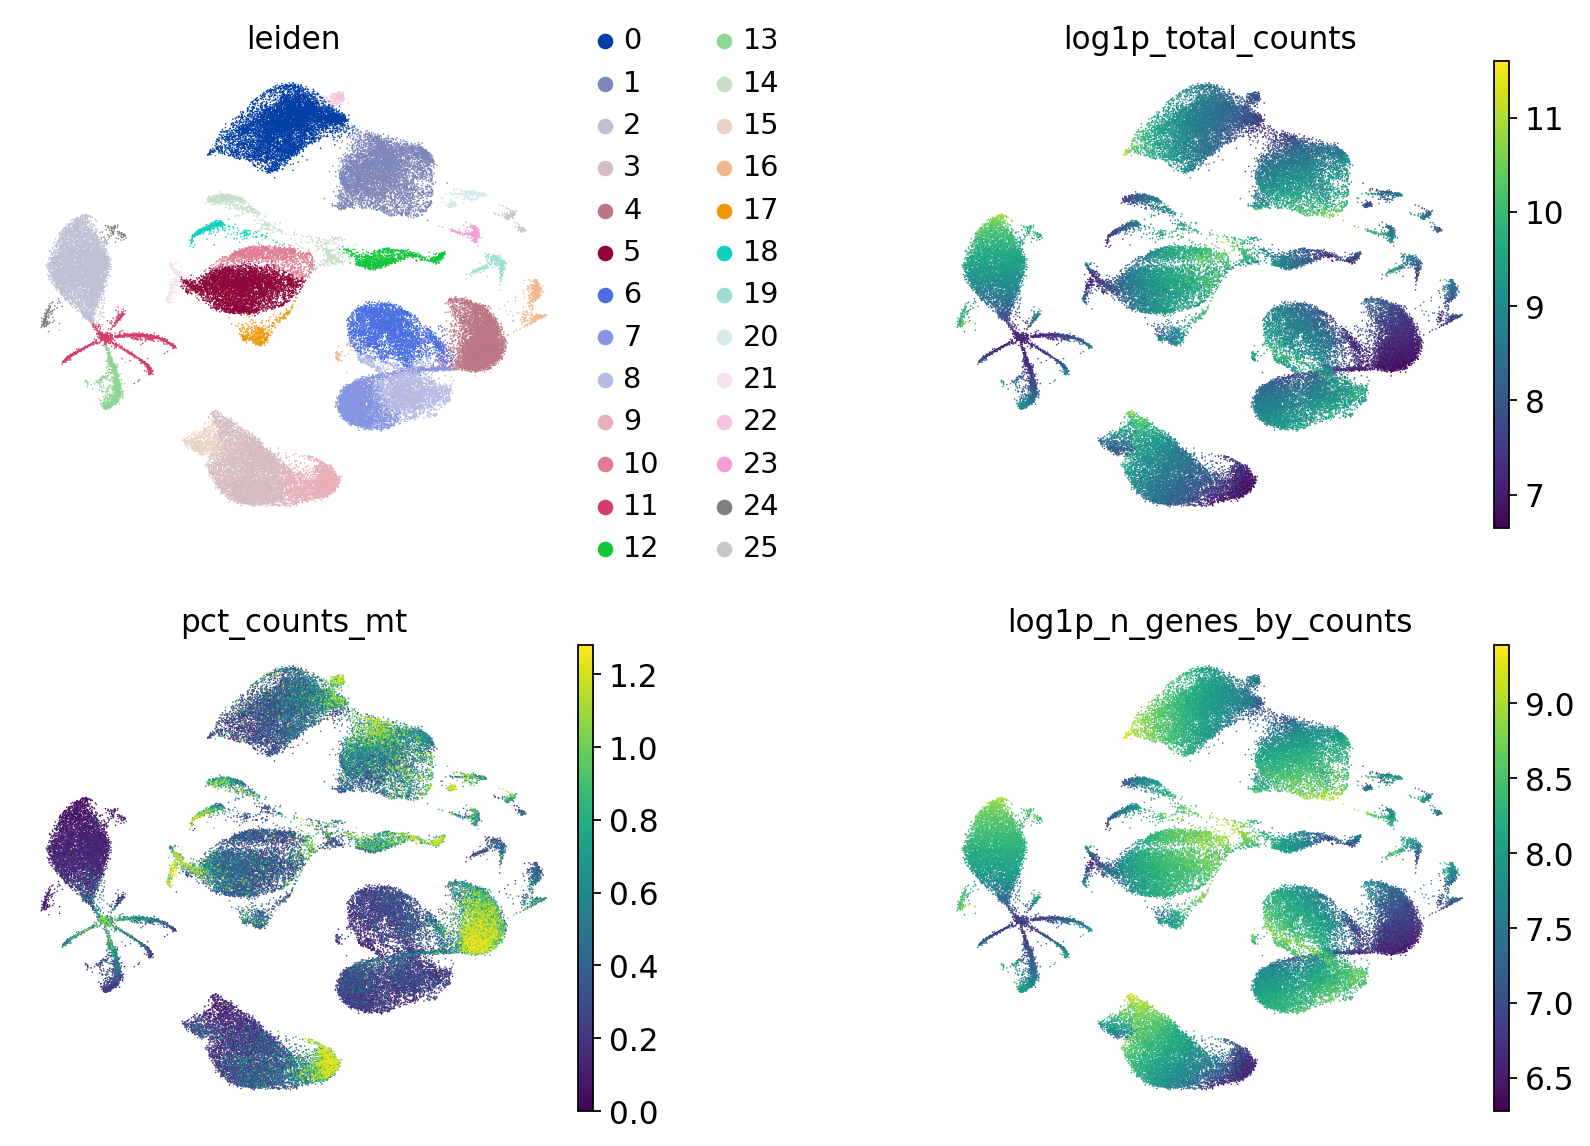

In [50]:
sc.pl.umap(
    adata,
    color=["leiden", "log1p_total_counts", "pct_counts_mt", "log1p_n_genes_by_counts"],
    wspace=0.5,
    ncols=2,
)

------
## <span style="color:palevioletred">10. Manual cell-type annotation</span>
**Anotación manual de tipos de células**: La anotación de tipos celulares es una tarea laboriosa y repetitiva que generalmente implica varias rondas de subagrupamiento y reanotación. Aunque es difícil abarcar todo el proceso en este tutorial, nuestro objetivo es demostrar cómo las herramientas proporcionadas por Scanpy facilitan esta tarea.

Hemos llegado a un punto en el que tenemos un conjunto de células de calidad aceptable y podemos proceder a su anotación en tipos celulares conocidos. Este proceso normalmente se basa en la identificación de genes que se expresan exclusivamente en tipos celulares específicos; estos genes son considerados marcadores y se utilizan para distinguir entre los diferentes grupos heterogéneos de células en nuestros datos. Investigaciones anteriores han recopilado y curado una variedad de genes marcadores en recursos como CellMarker, TF-Marker y PanglaoDB. Además, la herramienta de expresión génica cellxgene puede ser muy útil para visualizar en qué tipos de células se expresa un gen en diversos conjuntos de datos existentes.

Tradicionalmente, la anotación de tipos celulares se realiza utilizando estos genes marcadores después de agrupar las células en clústeres. Por lo tanto, generaremos un conjunto de soluciones de agrupamiento que podremos utilizar para anotar nuestros tipos celulares. En este caso, emplearemos el algoritmo de agrupamiento de Leiden, que extraerá comunidades celulares de nuestro grafo de vecinos más cercanos.

1. **Clusterización con diferentes resoluciones**:
   ```python
   for res in [0.02, 0.5, 2.0]:
       sc.tl.leiden(adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph")
   sc.pl.umap(
       adata,
       color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
       legend_loc="on data",
   )
   ```
   Realiza la clusterización Leiden con varias resoluciones y visualiza los clusters resultantes.

In [51]:
for res in [0.02, 0.5, 2.0]:
    sc.tl.leiden(
        adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

Es importante señalar que el número de grupos que definimos es en gran medida arbitrario, así como el parámetro `resolution` que utilizamos para ajustarlo. En última instancia, el número de grupos está relacionado con la capacidad de distinguir clústeres estables y biológicamente significativos, lo cual suele ser realizado por expertos en el área correspondiente o mediante el uso de conocimientos previos seleccionados, representados en forma de marcadores. Esto significa que la elección de grupos debe ser informada y contextualizada para garantizar una anotación precisa y relevante.

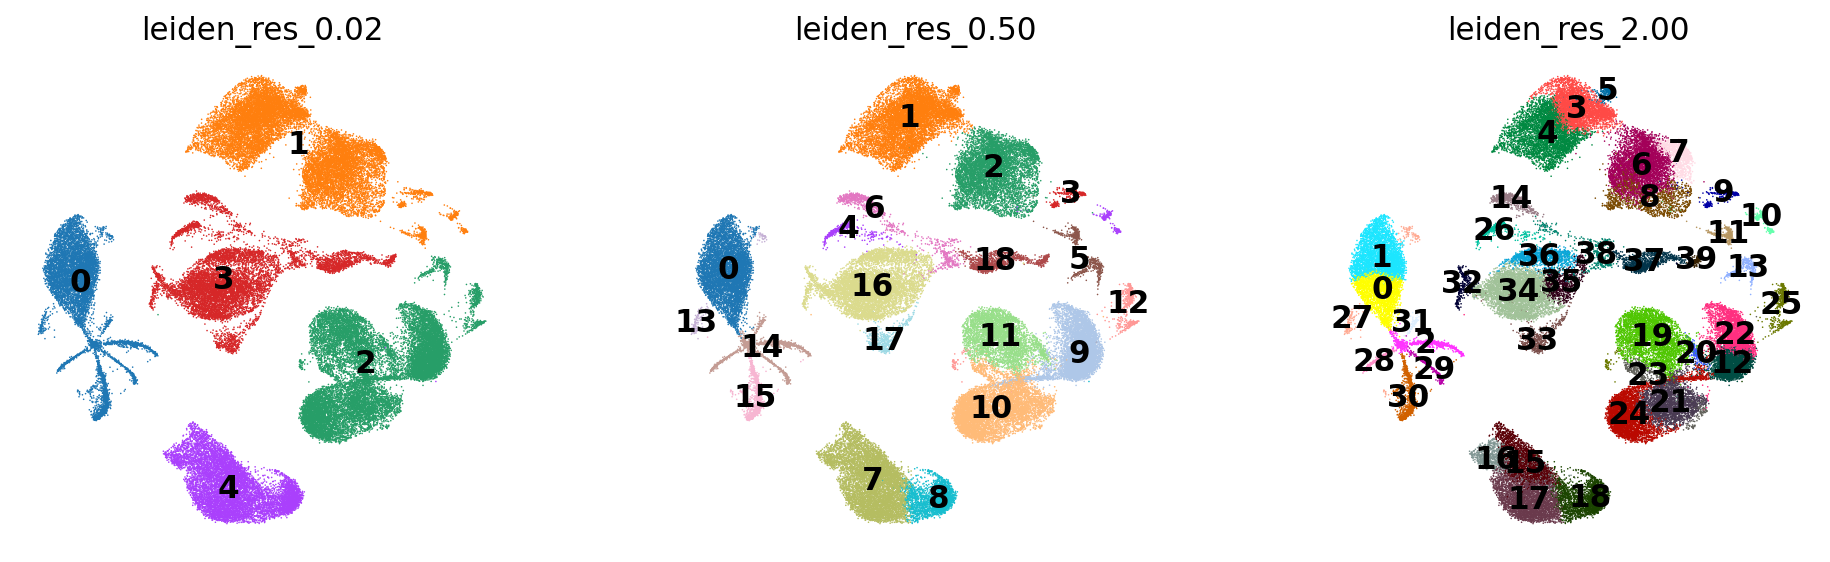

In [52]:
sc.pl.umap(
    adata,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
)

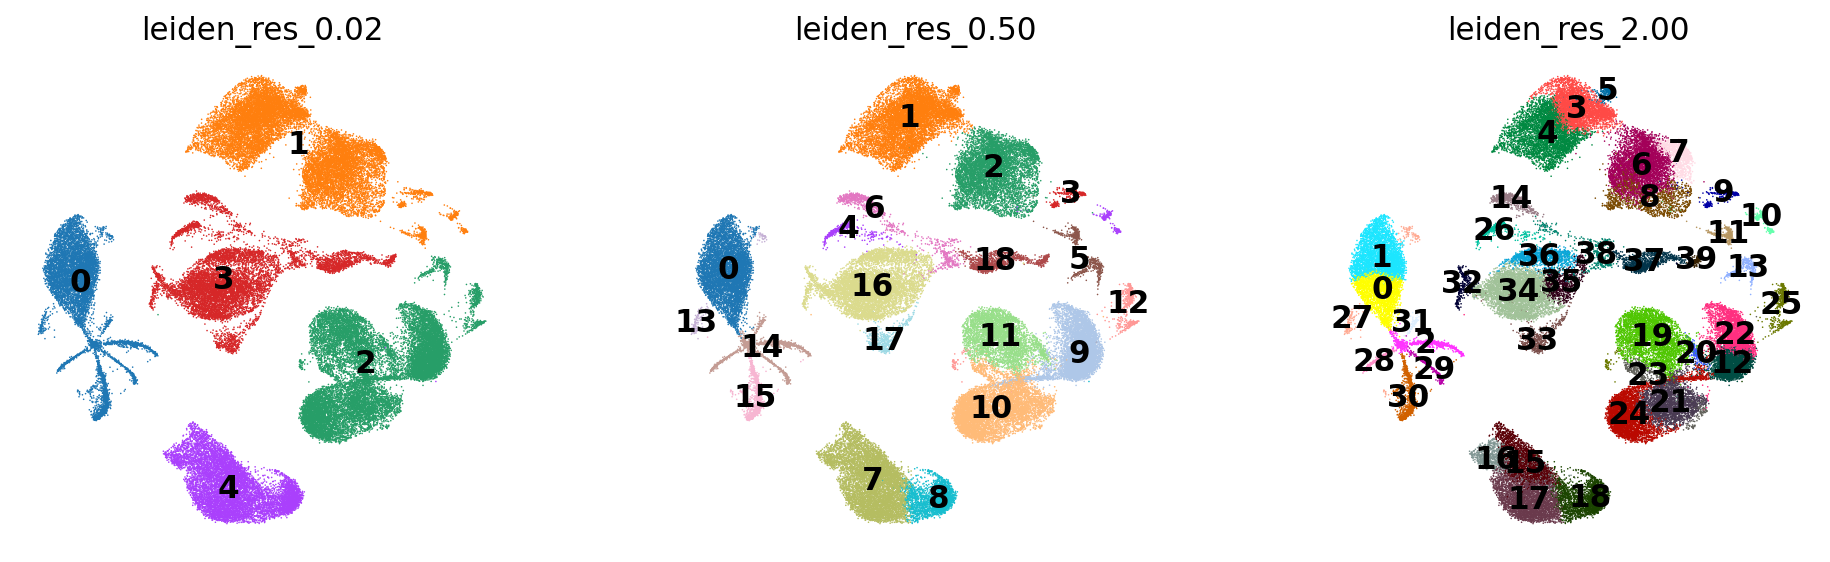

In [53]:
sc.pl.umap(
    adata,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
)

Aunque no debemos sobreinterpretar los resultados de los UMAP, podemos observar que, en la resolución más alta, nuestros datos parecen estar sobreagrupados. En contraste, la resolución más baja probablemente agrupe células que pertenecen a identidades celulares diferentes. Esta observación subraya la importancia de ajustar cuidadosamente el parámetro de resolución para lograr una representación más precisa de la heterogeneidad celular en nuestros datos.